In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import numpy.linalg as la
import pandas as pd

import sys
sys.path.append('../mchem_functions/')
import multivariate_functions as mvf

In [2]:
coordinates_file = '../../Fieldwork/QGIS maps/SamplingSites.csv'
threshold_times = 4

In [3]:
coord_df = pd.read_csv(coordinates_file)[['field_1','Easting','Northing']]

AM_coord_df = coord_df[coord_df['field_1'].str.contains('AM')]
AM_letters = AM_coord_df['field_1'].to_numpy()
AM_coord_array = AM_coord_df[['Easting','Northing']].to_numpy()

HM_coord_df = coord_df[coord_df['field_1'].str.contains('HM')]
HM_letters = HM_coord_df['field_1'].to_numpy()
HM_coord_array = HM_coord_df[['Easting','Northing']].to_numpy()
# HM_coord_array

Text(0.5, 1.0, 'HM Map')

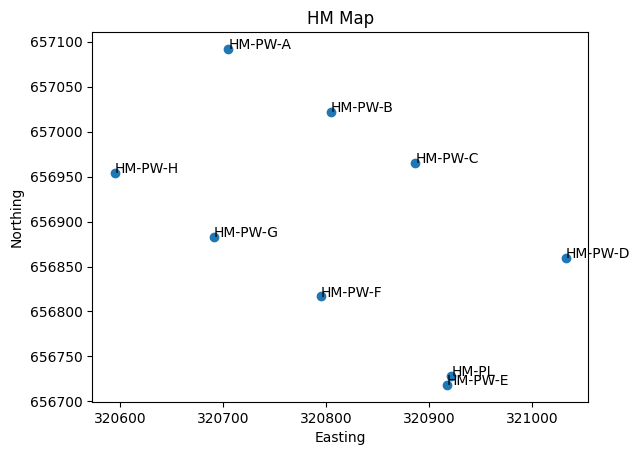

In [4]:
fig_HM_map, ax_HM_map = plt.subplots()
x = 'Easting'
y = 'Northing'
ax_HM_map.scatter(HM_coord_df[x],HM_coord_df[y])

for i in range(len(HM_coord_df)):
    ax_HM_map.text(HM_coord_df[x].to_numpy()[i],HM_coord_df[y].to_numpy()[i],HM_coord_df['field_1'].to_numpy()[i])

ax_HM_map.set_xlabel(x)
ax_HM_map.set_ylabel(y)
ax_HM_map.set_title('HM Map')

In [5]:
HM_dist_matr = mvf.eucl_dist(HM_coord_array)
pd.DataFrame(HM_dist_matr,index=HM_letters,columns=HM_letters)

,HM-PL,HM-PW-A,HM-PW-B,HM-PW-C,HM-PW-D,HM-PW-E,HM-PW-F,HM-PW-G,HM-PW-H
HM-PL,0.000000,422.946460,316.191533,239.487669,171.843540,11.003556,154.497746,277.507299,397.120900
HM-PW-A,422.946460,0.000000,121.384265,221.261640,401.378646,429.621507,289.337223,209.127721,176.328978
HM-PW-B,316.191533,121.384265,0.000000,99.878320,279.997425,324.173050,205.709633,179.401727,220.435700
HM-PW-C,239.487669,221.261640,99.878320,0.000000,180.135097,248.999835,174.801352,212.110817,292.055969
HM-PW-D,171.843540,401.378646,279.997425,180.135097,0.000000,182.353455,241.623764,342.169288,447.779806
HM-PW-E,11.003556,429.621507,324.173050,248.999835,182.353455,0.000000,157.224327,279.893525,399.587674
HM-PW-F,154.497746,289.337223,205.709633,174.801352,241.623764,157.224327,0.000000,123.058499,242.624636
HM-PW-G,277.507299,209.127721,179.401727,212.110817,342.169288,279.893525,123.058499,0.000000,119.695520
HM-PW-H,397.120900,176.328978,220.435700,292.055969,447.779806,399.587674,242.624636,119.695520,0.000000


In [6]:
HM_threshold = mvf.get_threshold(HM_dist_matr)

In [7]:
# a = np.array([
# [0,         4.551,  18.204,     8.306,  14.041],
# [4.551,     0,      12.714,     3.918,  12.551],
# [18.204,    12.714, 0,          8.633,  8.735],
# [8.306,     3.918,  8.633,      0,      7.490],
# [14.041,    12.551, 8.735,      7.490,  0]])

# eigvals,eigvecs,coordinates,proportion_explained = PCoA(a,number_of_dimensions=2)

# plt.scatter(coordinates[:,0],coordinates[:,1])
# labels= ['kites','airplanes','cats','birds','deer']
# for i in range(len(labels)):
#     plt.text(coordinates[i,0],coordinates[i,1],labels[i])

In [8]:
# # Pairwise distance between European cities
# url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/refs/heads/master/datasets/eurodist.csv'
# df = pd.read_csv(url)
# print(df)
# print()
# ## Array with cities:
# city = np.array(df["city"])

# ## Squareform distance matrix
# D = np.array(df)[:,1:]
# eigvect,eigvals,coordinates,proportion_explained = PCoA(D)
# plt.scatter(-coordinates[:,0],coordinates[:,1])
# for i in range(len(city)):
#     plt.text(-coordinates[i,0], coordinates[i,1], city[i])

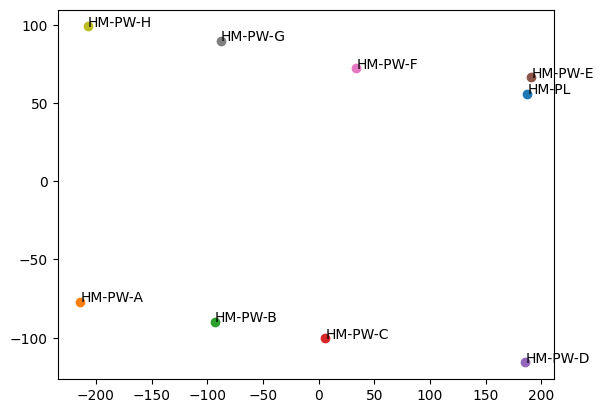

In [9]:
# PCoA
fig_pcoa, ax_pcoa = plt.subplots()
pcoa_eigvals,pcoa_eigvecs,pcoa_coordinates,pcoa_proportion_explained = mvf.PCoA(HM_dist_matr,number_of_dimensions=2)
for i in range(len(HM_letters)):
    ax_pcoa.scatter(-pcoa_coordinates[i,0],pcoa_coordinates[i,1])
    ax_pcoa.text(-pcoa_coordinates[i,0],pcoa_coordinates[i,1],HM_letters[i])

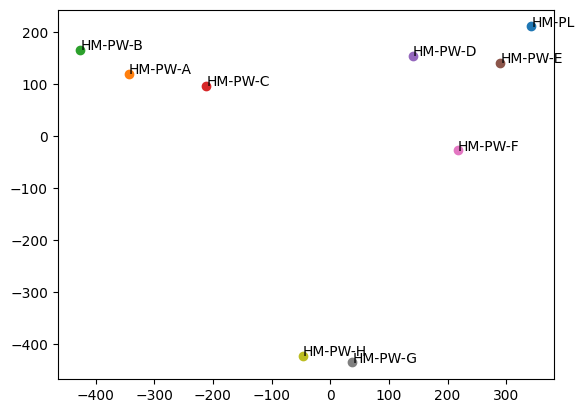

In [10]:
# PCNM
fig_pcnm, ax_pcnm = plt.subplots()
pcnm_eigvals,pcnm_eigvecs,pcnm_coordinates,pcnm_proportion_explained = mvf.PCNM(HM_dist_matr,HM_threshold)
for i in range(len(HM_letters)):
    ax_pcnm.scatter(pcnm_coordinates[i,0],pcnm_coordinates[i,1])
    ax_pcnm.text(pcnm_coordinates[i,0],pcnm_coordinates[i,1],HM_letters[i])

In [11]:
pd.DataFrame(pcnm_eigvecs)

,0,1,2,3,4,5,6,7,8
0,0.436339,0.295026,-0.161511,0.004359,-0.018960,-0.333333,0.0,0.0,0.0
1,-0.436949,0.167611,-0.256628,0.505499,0.360671,-0.333333,0.0,0.0,0.0
2,-0.542960,0.232445,0.044926,0.004337,-0.150836,-0.333333,0.0,0.0,0.0
3,-0.269501,0.135468,0.489895,-0.496238,-0.183249,-0.333333,0.0,0.0,0.0
4,0.179035,0.215678,-0.570882,-0.512149,0.153091,-0.333333,0.0,0.0,0.0
5,0.369399,0.197476,0.168803,0.485640,-0.398315,-0.333333,0.0,0.0,0.0
6,0.277210,-0.039339,0.494474,-0.000162,0.360651,-0.333333,0.0,0.0,0.0
7,0.047629,-0.611491,0.045928,0.004277,0.435209,-0.333333,0.0,0.0,0.0
8,-0.060202,-0.592875,-0.255003,0.004438,-0.558263,-0.333333,0.0,0.0,0.0


In [12]:
pcnm_dist = mvf.eucl_dist(pcnm_coordinates)
pd.DataFrame(pcnm_dist,index=HM_letters,columns=HM_letters)

,HM-PL,HM-PW-A,HM-PW-B,HM-PW-C,HM-PW-D,HM-PW-E,HM-PW-F,HM-PW-G,HM-PW-H
HM-PL,0.000000,746.000801,781.900356,742.867119,422.363939,347.667285,506.319272,739.308640,763.358518
HM-PW-A,746.000801,0.000000,361.770008,715.249109,728.891468,725.635515,788.735531,742.338626,721.882088
HM-PW-B,781.900356,361.770008,0.000000,436.676378,738.540347,762.818474,745.941373,780.057517,735.207765
HM-PW-C,742.867119,715.249109,436.676378,0.000000,764.096761,730.965286,536.090149,721.274009,768.530770
HM-PW-D,422.363939,728.891468,738.540347,764.096761,0.000000,714.899967,746.282114,762.515444,720.488741
HM-PW-E,347.667285,725.635515,762.818474,730.965286,714.899967,0.000000,432.555466,723.459354,749.019827
HM-PW-F,506.319272,788.735531,745.941373,536.090149,746.282114,432.555466,0.000000,528.152600,725.960753
HM-PW-G,739.308640,742.338626,780.057517,721.274009,762.515444,723.459354,528.152600,0.000000,367.663630
HM-PW-H,763.358518,721.882088,735.207765,768.530770,720.488741,749.019827,725.960753,367.663630,0.000000


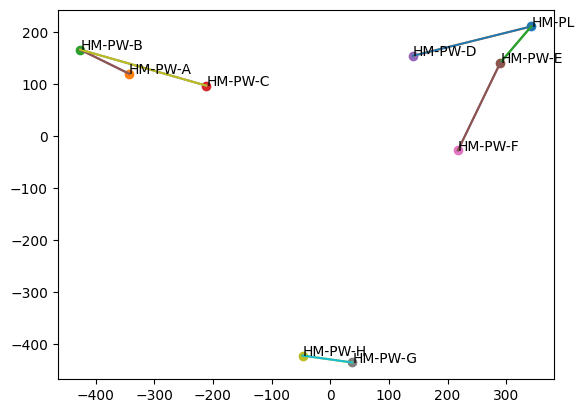

In [13]:
for i in range(len(HM_letters)):
    plt.scatter(pcnm_coordinates[i,0],pcnm_coordinates[i,1])
    plt.text(pcnm_coordinates[i,0],pcnm_coordinates[i,1],HM_letters[i])

    for j in range(len(pcnm_dist[:,i:])):
        if pcnm_dist[i,j] < 480:
            plt.plot([pcnm_coordinates[i,0],pcnm_coordinates[j,0]],[pcnm_coordinates[i,1],pcnm_coordinates[j,1]])